<h1 style="color: #FF8C00;">Univariate Analysis: Diving into Amazon UK Product Insights</h1>

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

## Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## 00 | Data Extraction and Wrangling

00.01 | Extraction

In [2]:
draft = pd.read_csv('amz_uk_price_dataset.csv')

In [3]:
draft.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


00.02 | Wrangling

In [5]:
draft.set_index('uid', inplace=True) # uid looks like previous index

In [6]:
draft.isna().sum()

asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
draft.duplicated().sum()

0

In [8]:
draft.eq(' ').sum()

asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

00.03 | Initial Dataframe

In [9]:
df = draft.copy()

---

## Part 1: Understanding Product Categories
**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1.1 | Frequency Tables

Generate a frequency table for the product category. Which are the **top 5** most listed product categories?

In [10]:
top_cat = df['category'].value_counts().reset_index()[:5]
top_cat

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


1.2 | Visualizations

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

In [11]:
categories = {
    "Sports & Outdoors": "Sports",
    "Beauty": "Beauty",
    "Handmade Clothing, Shoes & Accessories": "Handmade Clothes",
    "Bath & Body": "Bath & Body",
    "Birthday Gifts": "Birthday Gifts"
}

top_cat['category'] = top_cat['category'].replace(categories)

In [12]:
top_cat

,category,count
0,Sports,836265
1,Beauty,19312
2,Handmade Clothes,19229
3,Bath & Body,19092
4,Birthday Gifts,18978


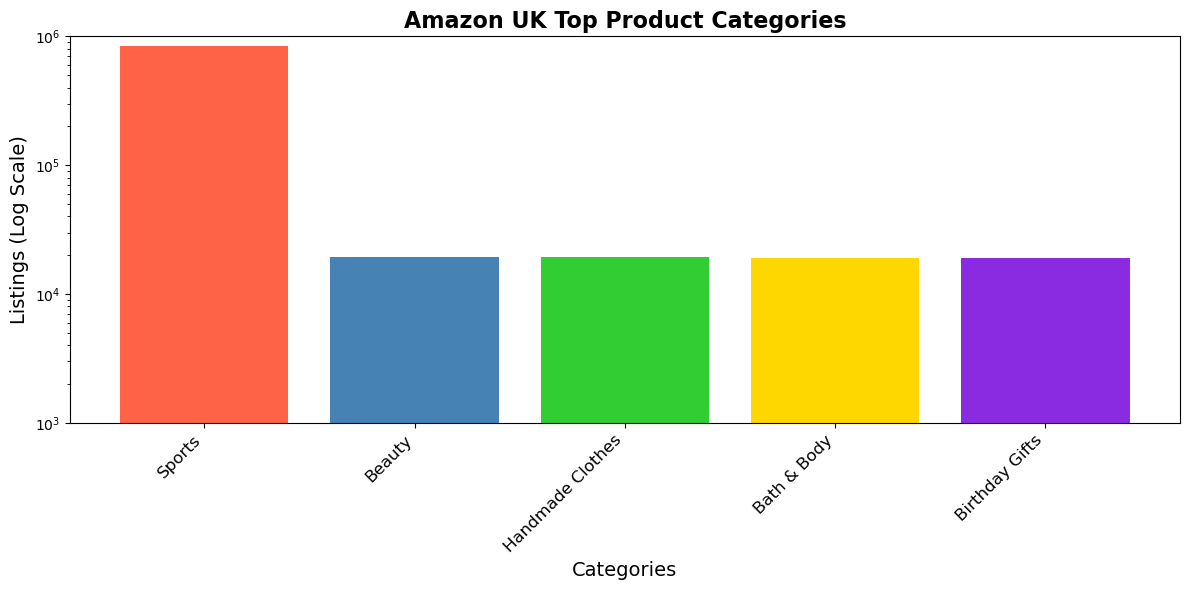

In [13]:
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(top_cat['category'], top_cat['count'], color=colors)
ax.set_yscale('log') # So Sports don't stand out too much
ax.set_ylim(10**3, 10**6) # Make it a bit more appealing to the eye
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Listings (Log Scale)', fontsize=14)
ax.set_title('Amazon UK Top Product Categories', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Text(0, 0.5, '')

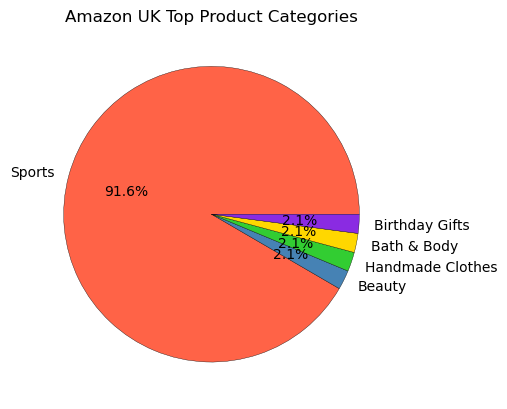

In [14]:
top_cat.set_index('category')['count'].plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    colors = colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.25}
)
plt.title('Amazon UK Top Product Categories')
plt.ylabel('')

1.3 | Conclusion

The product listings on Amazon UK is **heavily dominated by the "Sports & Outdoors" category**, which accounts for a staggering number of 836K listings, over 40 times more than any other category. The remaining four categories — Beauty, Handmade Clothes, Bath & Body, and Birthday Gifts — each contribute around 20,000 listings, showing a much smaller, but relatively equal, distribution among them. 

Basically, 9 out of 10 products listed on Amazon UK are from the Sports & Outdoors category.

---

---

## Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

2.1 | Measures of Centrality

- Calculate the mean, median, and mode for the price of products.- 
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [15]:
price_mean = df['price'].mean().round(2)
print(f'The average price for Amazon UK products is £{price_mean}')

The average price for Amazon UK products is £89.24


In [16]:
price_median = df['price'].median()
print(f'Half the products listed on Amazon UK cost up to £{price_median}')

Half the products listed on Amazon UK cost up to £19.09


In [17]:
price_mode = df['price'].mode()[0]
print(f'The most common price for Amazon UK products is £{price_mode}')

The most common price for Amazon UK products is £9.99


The average price of products listed on Amazon UK is £89.24, which is much higher than the most common price of £9.99. While £9.99 is the most frequent price, indicating that many products are priced lower, the high average suggests that a few high-priced items are significantly raising the overall mean. Additionally, half of the products are priced up to £19.09, showing that many listings are relatively affordable, but the presence of expensive products skews the average upward.

2.2 | Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [18]:
# I decided to manually calculate the variance just for fun (and to practice theoretical knowledge in Statistics)
price_var = df['price'].apply(lambda x: (x - price_mean) ** 2).mean().round(2)
print(f'Variance is {price_var}')

Variance is 119445.44


In [19]:
price_std = np.sqrt(price_var).round(2) # Again, manually calculating standard deviation
print(f'Standard Deviation is {price_std}')

Standard Deviation is 345.61


In [20]:
price_range = (df['price'].max() - df['price'].min())
print(f'Prices range from £{df['price'].min()} to £{df['price'].max()}')

Prices range from £0.0 to £100000.0


The prices in this dataset range from £0.0 to £100,000.0, which likely includes outliers and possible typographical errors. After a brief web comparison, it appears that some prices may not even be in the same currency, introducing further inconsistencies. However, without clear indicators or metadata for each currency, accurately identifying and correcting these discrepancies would require an intensive data-cleaning effort that falls beyond the scope of this lab.

In [25]:
Q1 = df['price'].quantile(0.25).round(2)
Q3 = df['price'].quantile(0.75).round(2)
print(f'First Quartile: £{Q1}\nThird Quartile: £{Q3}')

First Quartile: £9.99
Third Quartile: £45.99


2.3 | Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

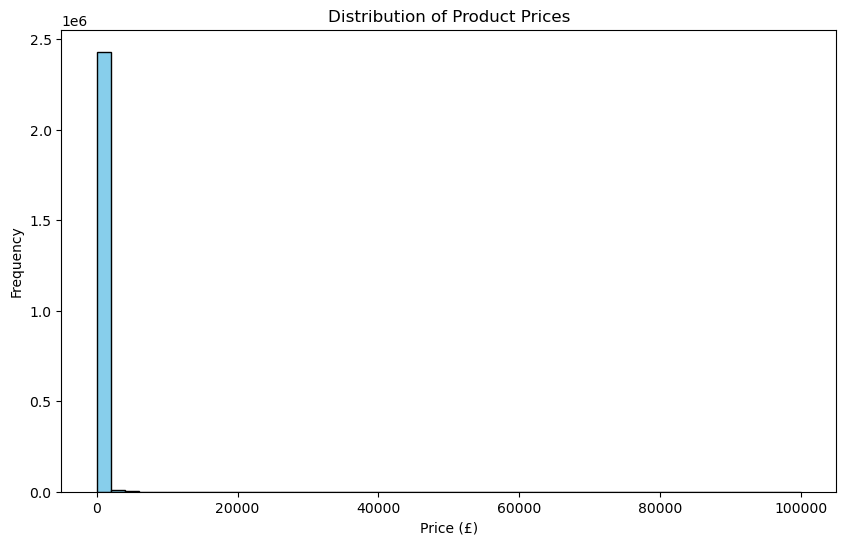

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')  # Adjust 'bins' as needed

plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')

plt.show()

This initial histogram of product prices is very challenging to interpret due to extreme skewness. A third of the items cost less than £45.99, with a few very high prices stretching the distribution. It's possible to addres this by applying a log transformation, which compresses large values and expands smaller ones, making the data spread more evenly. This adjustment allows for clearer visualization of the price distribution, revealing patterns that were previously obscured in the untransformed data. Using a log scale is particularly useful when dealing with data that spans multiple orders of magnitude, as it enhances readability by reducing the impact of outliers.

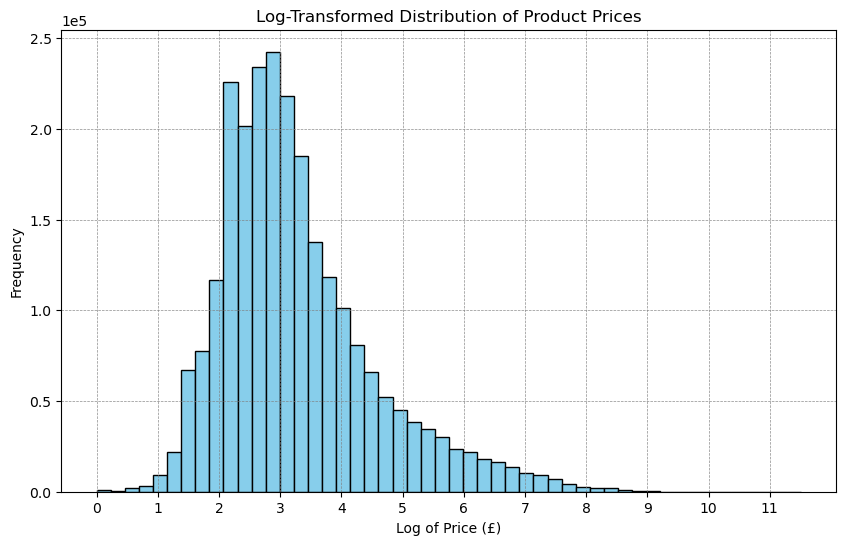

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(df['price']), bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Log of Price (£)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Product Prices')

# Define tick locations on the x-axis
max_log_price = int(np.log1p(df['price']).max())  # Find the maximum log-transformed value
plt.xticks(ticks=np.arange(0, max_log_price + 1, 1))  # Add ticks from 0 to max value at intervals of 1

# Set y-axis to scientific notation
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.9)
plt.show()

When using `np.log1p(df['price'])` in a histogram, the x-axis shows log-transformed values, which range from 0 to around 12 in the plot. Each x-axis number represents a logarithmic transformation of actual prices. Here’s how to interpret these values approximately:

- **x = 0**: Represents a price of around £0 (since log(1) = 0).
- **x = 1**: Represents a price of about £2 (since log(2) ≈ 0.693).
- **x = 2**: Represents a price of around £6.39 (since log(7) ≈ 2).
- **x = 3**: Represents a price of about £19.08 (since log(20) ≈ 3).
- **x = 4**: Represents a price around £54.6 (since log(55) ≈ 4).
- **x = 5**: Represents a price near £148 (since log(149) ≈ 5).
- **x = 6**: Represents a price of around £403 (since log(404) ≈ 6).
- **x = 7**: Represents a price near £1096 (since log(1097) ≈ 7).
- **x = 8**: Represents a price around £2981 (since log(2982) ≈ 8).
- **x = 9**: Represents a price near £8103 (since log(8104) ≈ 9).
- **x = 10**: Represents a price around £22026 (since log(22027) ≈ 10).
- **x = 11**: Represents a price of about £59874 (since log(59875) ≈ 11).
- **x = 12**: Represents a price near £162755 (since log(162756) ≈ 12).

So, each value on the x-axis corresponds to a log-transformed price, meaning that even intervals represent exponential increases in actual prices. This allows you to view the full range of prices, including outliers, without them dominating the plot.

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

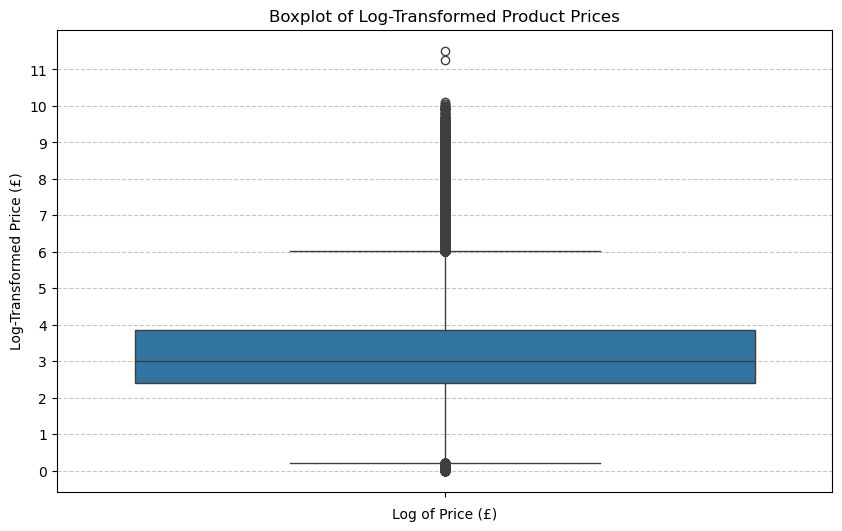

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = np.log1p(df['price']))

plt.xlabel('Log of Price (£)')
plt.ylabel('Log-Transformed Price (£)')
plt.title('Boxplot of Log-Transformed Product Prices')

plt.grid(axis='y', linestyle='--', alpha=0.7)
max_log_price = int(np.log1p(df['price']).max())  # Find the maximum log-transformed value
plt.yticks(ticks=np.arange(0, max_log_price + 1, 1))  # Add ticks from 0 to max value at intervals of 1

plt.show()

Yes, there are products priced significantly higher than the rest. The majority of items have prices that range from a log value of 2 (around £7) to 4 (around £54), with the mean for prices within this normal range falling around a log value of 3 (approximately £19). The box plot clearly showcases this spread, highlighting the typical price range, while also revealing some extreme outliers at both the lower and higher ends of the price spectrum.

---

---

## Part 3: Unpacking Product Ratings
**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

3.1 | Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

To ensure accurate analysis of customer ratings, I am filtering out products with no reviews. Products without reviews are recorded with a rating of 0 stars, which can significantly skew the data. By focusing on products with actual reviews, I can better understand how customers rate the products and avoid the distortion caused by these unreviewed items. This will provide a clearer picture of customer satisfaction and trends.

In [97]:
df2 = df[df['reviews'] > 1] # We select products with at least one review
print(f'There are {len(df2)} products reviewed in Amazon UK')

There are 1127977 products reviewed in Amazon UK


In [99]:
stars_mean = df2['stars'].mean().round(1)
print(f'The average product rate is {stars_mean} stars')

The average product rate is 4.3 stars


In [101]:
stars_median = df2['stars'].median()
print(f'Half the ratings fall within {stars_median} stars')

Half the ratings fall within 4.4 stars


In [103]:
stars_mode = df2['stars'].mode()[0]
print(f'The most popular rating is {stars_mode} stars')

The most popular rating is 4.5 stars


This is a **strong positive trend**, with an average rating of 4.3 out of 5. The majority of ratings fall between 4.1 and 4.6, suggesting that most customers are satisfied with their purchases. The data reveals a concentration in the upper range, reflecting overall satisfaction with the products.

3.2 | Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [109]:
print(f'Variance is {round(df2['stars'].var(), 1)} stars')

Variance is 0.2 stars


In [112]:
print(f'The ratings vary more or less {round(df2['stars'].std(), 1)} stars')

The ratings vary more or less 0.5 stars


In [111]:
print(f'First quartile is {round(df2['stars'].quantile(0.25), 1)} stars')
print(f'Third quartile is {round(df2['stars'].quantile(0.75), 1)} stars')

First quartile is 4.1 stars
Third quartile is 4.6 stars


Ratings are **consistent**, suggesting that **there is not a wide variation in customer feedback**. Most ratings are close to the average rating.

3.3 | Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?